## Conll 2002 Data Analisys

Analisis of the dataset..


In [15]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [16]:
def read_dataset(filepath):
    sentences = []
    labels = []
    with Path(filepath).open() as f:
        token = []
        tag = []
        for line in f:
            data = line.split()
            if len(data) > 0:
                token.append(data[0])
                tag.append(data[2])
            else:
                sentences.append(token)
                labels.append(tag)
                token = []
                tag = []
    return sentences, labels

In [37]:
for dataset in ['dataset/conll2002/esp.testa', 'dataset/conll2002/esp.testb', 'dataset/conll2002/esp.train', 
               'dataset/conll2002/ned.testa', 'dataset/conll2002/ned.testb', 'dataset/conll2002/ned.train']:
    sentences, labels = read_dataset(dataset)
    words = []
    for sentence in sentences:
        for word in sentence:
            words.append(word)
    
    print('{} has {} sentences, and {} words in total'.format(dataset, len(sentences), len(words)))

dataset/conll2002/esp.testa has 1915 sentences, and 52923 words in total
dataset/conll2002/esp.testb has 1517 sentences, and 51533 words in total
dataset/conll2002/esp.train has 8323 sentences, and 264715 words in total
dataset/conll2002/ned.testa has 2895 sentences, and 37761 words in total
dataset/conll2002/ned.testb has 5195 sentences, and 68994 words in total
dataset/conll2002/ned.train has 15806 sentences, and 202931 words in total


In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bastian/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

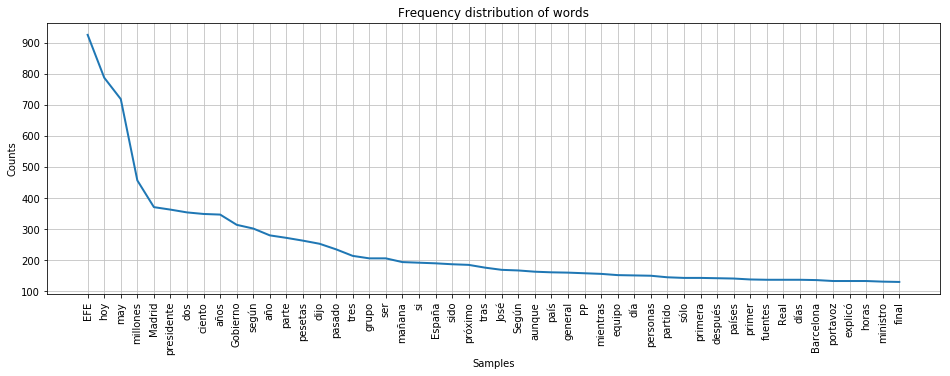

In [38]:
stop_words = set(nltk.corpus.stopwords.words('spanish'))
sentences, labels = read_dataset('dataset/conll2002/esp.train')
words = []
for sentence in sentences:
    for word in sentence:
        words.append(word)

tokens = [word for word in words if word.lower() not in stop_words and word.isalpha() ]
freqdist = nltk.FreqDist(tokens)
plt.figure(figsize=(16,5))
plt.title('Frequency distribution of words')
freqdist.plot(50)

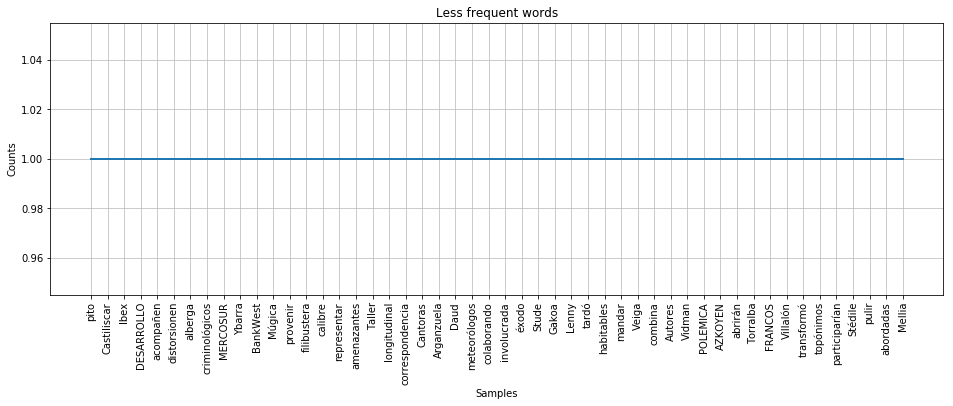

In [44]:
freqdist = nltk.FreqDist(tokens)
freqdist = nltk.FreqDist(dict(freqdist.most_common()[-50:]))
plt.figure(figsize=(16,5))
plt.title('Less frequent words')
freqdist.plot(50)

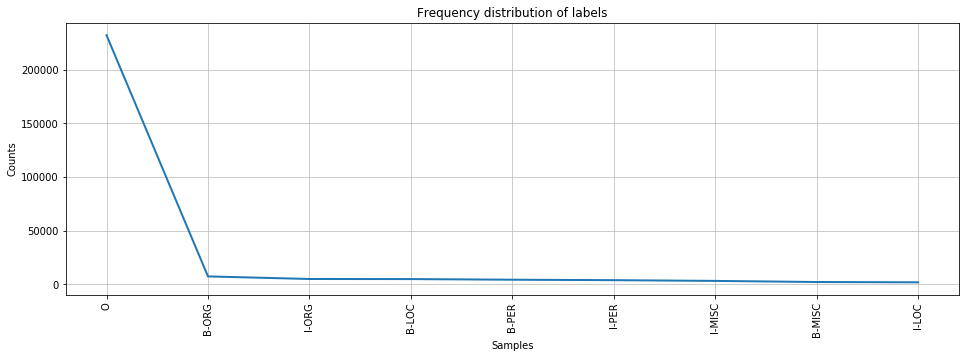

In [25]:
words = []
for sentence in labels:
    for word in sentence:
        words.append(word)

tokens = [word for word in words]
freqdist = nltk.FreqDist(tokens)
plt.figure(figsize=(16,5))
plt.title('Frequency distribution of labels')
freqdist.plot(50)

In [26]:
freqdist.tabulate()

     O  B-ORG  I-ORG  B-LOC  B-PER  I-PER I-MISC B-MISC  I-LOC 
231920   7390   4992   4913   4321   3903   3212   2173   1891 


In [30]:
MINCOUNT = 2

def build_vocab(words):
    counter_words = Counter(words)
    vocab_words = {w for w, c in counter_words.items() if c >= MINCOUNT}
    return sorted(list(vocab_words)), counter_words

In [33]:
stop_words = set(nltk.corpus.stopwords.words('spanish'))
sentences, labels = read_dataset('dataset/conll2002/esp.train')
words = []
for sentence in sentences:
    for word in sentence:
        words.append(word)

vocab_words, counter_words = build_vocab(words)
print('Kept {} out of {}'.format(len(vocab_words), len(counter_words)))
print(vocab_words[:10])

Kept 13491 out of 26099
['!', '"', '%', "'", "'2000", "'2006", "'92", "'98", "'El", '(']


In [36]:
for dataset in ['dataset/conll2002/esp.testa', 'dataset/conll2002/esp.testb', 'dataset/conll2002/esp.train', 
               'dataset/conll2002/ned.testa', 'dataset/conll2002/ned.testb', 'dataset/conll2002/ned.train']:
    sentences, labels = read_dataset(dataset)
    words = []
    for sentence in labels:
        for word in sentence:
            words.append(word)
    
    tokens = [word for word in words]
    freqdist = nltk.FreqDist(tokens)
    print("\n", dataset)
    freqdist.tabulate()



 dataset/conll2002/esp.testa
     O  B-ORG  I-ORG  B-PER  B-LOC  I-PER I-MISC B-MISC  I-LOC 
 45356   1700   1366   1222    984    859    654    445    337 

 dataset/conll2002/esp.testb
     O  B-ORG  I-ORG  B-LOC  B-PER  I-PER I-MISC B-MISC  I-LOC 
 45355   1400   1104   1084    735    634    557    339    325 

 dataset/conll2002/esp.train
     O  B-ORG  I-ORG  B-LOC  B-PER  I-PER I-MISC B-MISC  I-LOC 
231920   7390   4992   4913   4321   3903   3212   2173   1891 

 dataset/conll2002/ned.testa
     O B-MISC  B-PER  B-ORG  B-LOC  I-PER  I-ORG I-MISC  I-LOC 
 34047    748    703    686    479    423    396    215     64 

 dataset/conll2002/ned.testb
     O B-MISC  B-PER  B-ORG  I-PER  B-LOC  I-ORG I-MISC  I-LOC 
 63236   1187   1098    882    807    774    551    410     49 

 dataset/conll2002/ned.train
     O  B-PER B-MISC  B-LOC  I-PER  B-ORG I-MISC  I-ORG  I-LOC 
183633   4716   3338   3208   2883   2082   1405   1199    467 


In [118]:
def subcategorybar(X, vals, legend, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    plt.legend(legend)

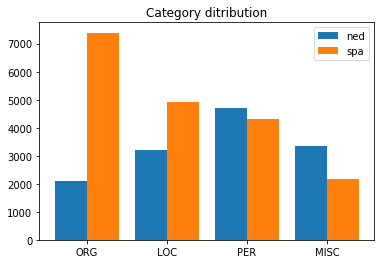

In [119]:
# | file       | ORG   | LOC   | PER   | MISC  |
# | ---------- | ----- | ----- | ----- | ----- |
# | ned.train  | 2082  | 3208  | 4716  | 3336  |
# | spa.train  | 7390  | 4913  | 4321  | 2173  |

ned = [2082, 3208, 4716, 3336]
spa = [7390, 4913, 4321, 2173]
    
plt.figure()
subcategorybar(['ORG', 'LOC', 'PER', 'MISC'], [ned, spa], ['ned', 'spa'])
plt.title('Category ditribution')
plt.show()

## Create Embeddings

In [11]:
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

np.random.seed(42)

In [147]:
words = np.array([word[1] for word in train_words + testa_words + testb_words])

In [159]:
from collections import Counter

vocabulary_size = 25000

vocabulary = [("<unk>", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [160]:
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels


In [161]:
data_index = 0
batch, labels = generate_batch(8, 2, 1)

In [162]:
batch, [vocabulary[word] for word in batch]

(array([  18,   18, 2012, 2012,   17,   17,    2,    2], dtype=int32),
 ['(', '(', 'Australia', 'Australia', ')', ')', ',', ','])

In [163]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[4386],
        [2012],
        [  17],
        [  18],
        [   2],
        [2012],
        [   9],
        [  17]], dtype=int32),
 ['Melbourne', 'Australia', ')', '(', ',', 'Australia', '<num>', ')'])

### Build the model

In [164]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [165]:
reset_graph()

# Input data.
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [166]:
vocabulary_size = 25000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [167]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [168]:
# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

### Train the model

In [169]:
num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  278.7625427246094
Nearest to a: detuvieron, resistan, Bellen, presenciar, Huwart, madridistas, disputaron, milenaria,
Nearest to millones: UNIDAD, Basti, comprometemos, mediana, elaborar, transcurrir, Isaías, empequeñece,
Nearest to esta: placentino, primeras, desnudaron, Theodore, Aizpuru, fechas, invierno, permanente,
Nearest to como: Albizu, declararse, mentiras, desnutrición, transporte, mejorarán, sequía, palo,
Nearest to o: apostar, SESSM, Hualde, Quiceno, Telecom, días, desempeñar, nubes,
Nearest to :: pianista, asistido, cursado, Robredo, demandan, Rudi, vitícola, discurren,
Nearest to por: Espinosa, otorgara, Móstoles, conociera, redunda, EVEREST, presenciado, ejerció,
Nearest to año: tesis, AMENAZA, Impuesto, Firestone, versiones, arrestado, impuesto, Sierra,
Nearest to Los: época., sociólogo, Comisaría, traumática, NACIONAL, vigencia, cierto, Hisusa,
Nearest to y: Jerez, plagados, García-Loygorri, gigavatios, presentan, leerá, estemos,

In [171]:
np.save("./embeddings/esp_final_embeddings.npy", final_embeddings)

### Plot the embeddings

In [172]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

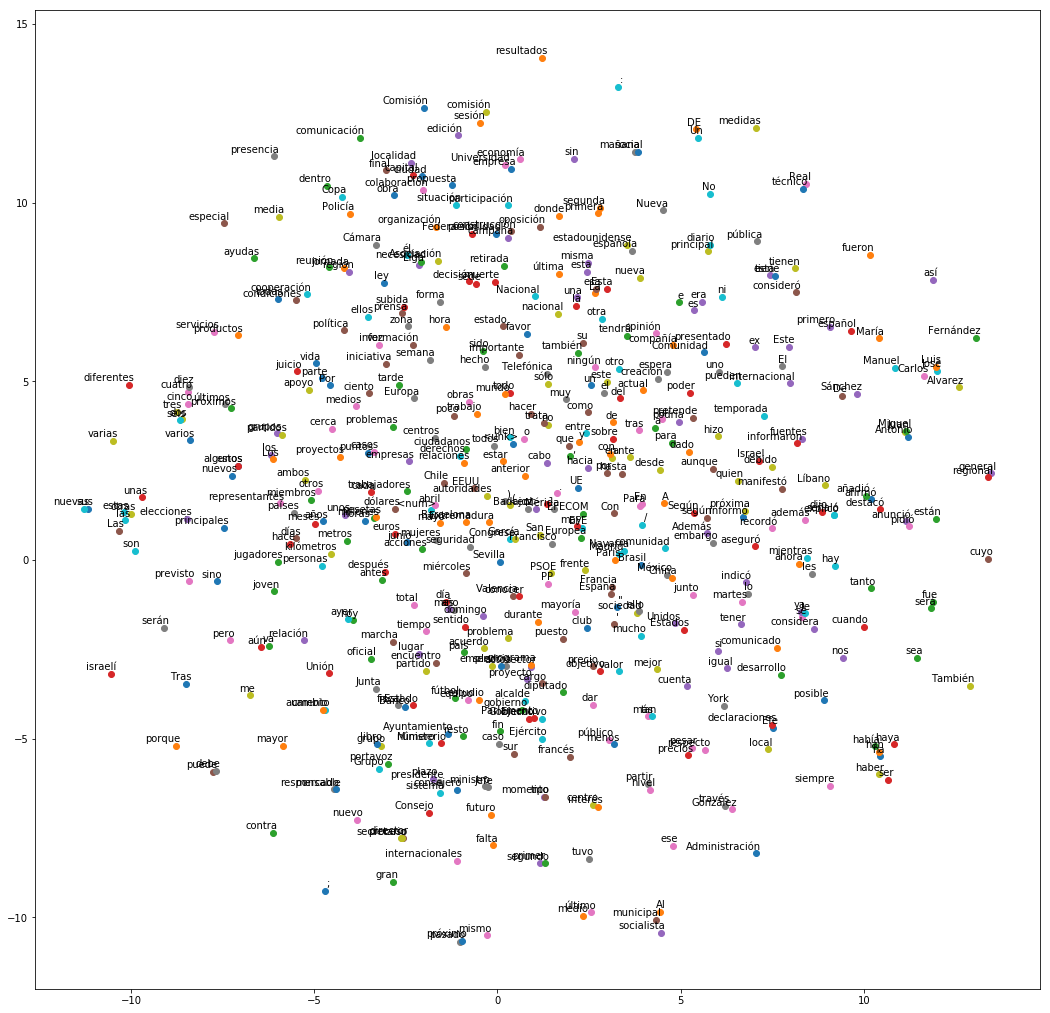

In [173]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

# Analisis of Results

In [2]:
from __future__ import print_function

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

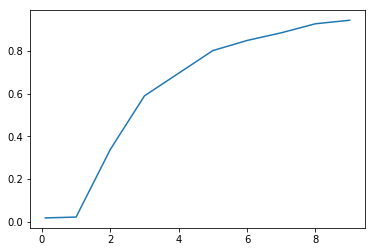

In [4]:
# ned - train - lc 0 a 9

f1 = [
    0.0172,
    0.0212,
    0.3380,
    0.5898,
    0.6959,
    0.8021,
    0.8495,
    0.8855,
    0.9279,
    0.9444
]

plt.plot([0.1] + list(range(1, len(f1))), f1)
plt.show()

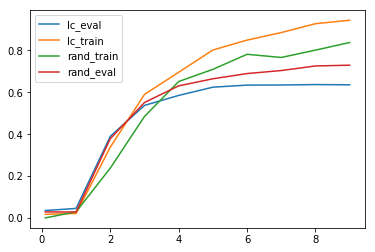

In [19]:
# ned - train/eval - lc 0 a 9

data = {
'lc_train': [
    0.0172,
    0.0212,
    0.3380,
    0.5898,
    0.6959,
    0.8021,
    0.8495,
    0.8855,
    0.9279,
    0.9444
],
'lc_eval': [
    0.0352,
    0.0454,
    0.3895,
    0.5374,
    0.5852,
    0.6246,
    0.6345,
    0.6350,
    0.6371,
    0.6359
],
'rand_train': [
    0.0,
    0.02915,
    0.2378,
    0.4846,
    0.6516,
    0.7098,
    0.7817,
    0.7666,
    0.8016,
    0.8381
],
'rand_eval': [
    0.0287,
    0.0281,
    0.3785,
    0.5513,
    0.6310,
    0.6647,
    0.6897,
    0.7041,
    0.7259,
    0.7297
]
}

x = [0.1] + list(range(1, len(data['lc_train'])))

for key in data:
    plt.plot(x, data[key])
plt.legend(data.keys())
plt.show()